# Global Goals step 1: Data Cleaning

In [ ]:
from inc import functions as f
from inc import stop_words as sw
from inc import extra_stopwords as esw
import pandas as pd
from sqlalchemy import create_engine
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
table_name = 'Goals'
engine = create_engine('sqlite:///db/goals.sqlite', echo=False)
data_df = pd.read_sql_table(table_name, engine)
data_df.set_index('Name', inplace=True, drop=True)

## Data cleaning

1. lemmatize text
2. clean text round 1
    - transform to lower case
    - replace punctuation with spaces
3. clean text round 2
    - remove new lines (replace with a single space)
    - remove some punctuation and non-sensical text that was missed in round 1

In [3]:
data_clean = pd.DataFrame(data_df.Description.apply(f.lemmatizeText))
data_clean = pd.DataFrame(data_clean.Description.apply(f.clean_text_round1))
data_clean = pd.DataFrame(data_clean.Description.apply(f.clean_text_round2))

2020-12-09 13:09:44 INFO: Downloading default packages for language: sv (Swedish)...
2020-12-09 13:09:45 INFO: File exists: /Users/nesko/stanza_resources/sv/default.zip.
2020-12-09 13:09:48 INFO: Finished downloading models and saved to /Users/nesko/stanza_resources.
2020-12-09 13:09:48 INFO: Loading these models for language: sv (Swedish):
| Processor | Package   |
-------------------------
| tokenize  | talbanken |
| pos       | talbanken |
| lemma     | talbanken |
| depparse  | talbanken |

2020-12-09 13:09:48 INFO: Use device: cpu
2020-12-09 13:09:48 INFO: Loading: tokenize
2020-12-09 13:09:48 INFO: Loading: pos
2020-12-09 13:09:49 INFO: Loading: lemma
2020-12-09 13:09:50 INFO: Loading: depparse
2020-12-09 13:09:51 INFO: Done loading processors!


In [5]:
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.common_stopwords)
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.extra_stopwords)

## CoutVectrizer

- default ngram_range(1,1) = __unigrams__
- for unigrams and __bigrams__ set ngram_range(1,2)

In [6]:
# cv = CountVectorizer(stop_words=sw.STOP_WORDS, ngram_range=(1, 2), max_features=1000)
cv = CountVectorizer(stop_words=sw.STOP_WORDS, max_features=1000)

In [7]:
data_cv = cv.fit_transform(data_clean.Description)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm = data_dtm.transpose()

__Find the top 30 words within each goal__

In [8]:
top_dict = {}
for c in data_dtm.columns:
    top = data_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

__Print the top 15 words within each goal__

In [9]:
for name, top_words in top_dict.items():
    print()
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')


fattigdom, människa, alla, ekonomisk, sprida, svår, extrem, köpa, utbildning, statlig, social, bidra, form, kunskap
---

mat, jordbruk, tillgång, hållbar, alla, människa, inklusive, livsmedelsproduktion, internationell, donera, behövande, värld, hung, kommun
---

hälsa, alla, sjukdom, människa, dödsfall, förebygga, sjukvård, antal, sjukhus, tillgång, läkemedel, förorening, drogmissbruk, grundläggande
---

utbildning, alla, kunskap, skola, värld, tillgång, kvalitet, människa, utveckling, säkerställa, engelsk, förskola, hållbar, antal
---

kvinna, alla, flicka, jämställdhet, möjlighet, röst, hörd, form, tillgång, våld, diskriminering, avskaffa, främja, visa
---

vatten, sanitet, tillgång, alla, människa, toalett, säker, förbättra, drabba, använda, värld, hållbar, organisation, uppmärksam
---

energi, använda, alla, elektricitet, tillgång, förnyba, teknik, ren, el, återvinna, elräkning, batteri, energieffektivitet, energitjänster
---

företag, främja, ekonomisk, människa, alla, hållbar, 

## WordCloud

In [10]:
wc = WordCloud(stopwords=sw.STOP_WORDS, background_color="white",
               colormap="Dark2", max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [30, 12]

__Create subplots for each Global Goal__

In [11]:
names = data_clean.index.values.tolist()

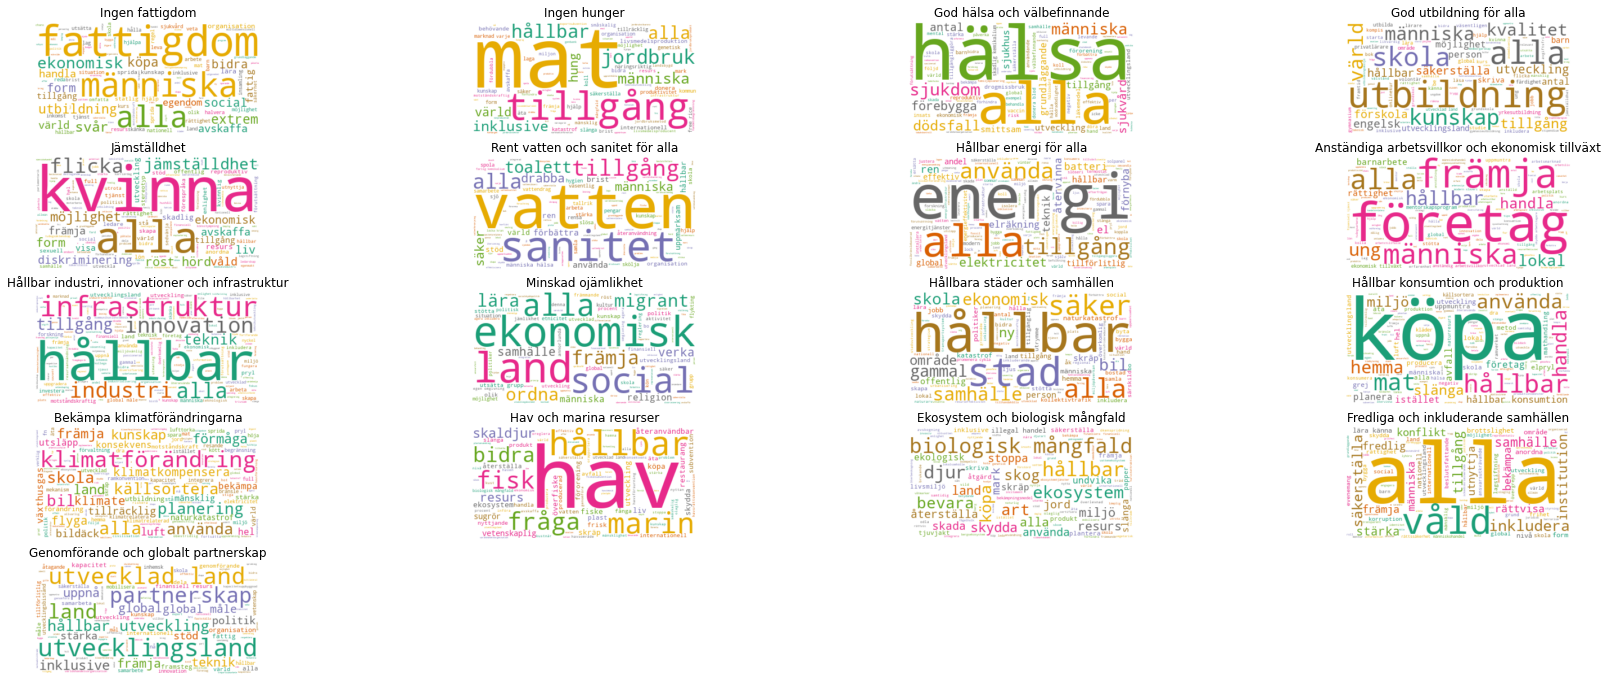

In [12]:
for index, name in enumerate(data_dtm.columns):
    wc.generate(data_clean.Description[name])

    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(names[index])

plt.show()